In [1]:
# import sys
# sys.path.append('/Users/daiyiluo/Documents/ELEC599')
import CalHMM
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn.hmm
import warnings
warnings.filterwarnings('ignore')
import imp

In [2]:
plt.show(block=True)

In [ ]:
imp.reload(CalHMM)

## a. Load data

In [2]:
folder = '/home/kemerelab/Documents/599/KQ095_210205' #dan_CA1'  #'KQ095_210205' #KQ086_210110' #
timebin = 500

In [3]:
data = np.load(f'{folder}/tb_{timebin}/timebin_{timebin}.npz') #{folder}/timebin_500.npz
Distance = data['Distance']
lap_end = [] #data['lap_end']
idx = data['idx']
del data

Spike = np.load(f'{folder}/tb_{timebin}/timebin_{timebin}_spks.npy')

Spike.shape, Distance.shape #, idx.shape # Spike should be of shape (#sample, #neuron)

((1821, 219), (1821,))

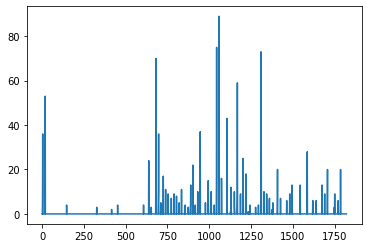

In [4]:
plt.plot(Spike[:,30])

## b. Run Poisson HMM
### Original data

In [5]:
origin = hmmlearn.hmm.PoissonHMM(n_components=20) 
origin.fit(Spike)

x1, plst1, occ1, posterior_states1, pos_COM1 = CalHMM.comp_poststates_pos(origin, Spike, Distance, sort='angle')
err_rate1, dev1, Decoded_position1 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states1, pos_COM1, mode = 'circle')

print(f'Error Rate: {err_rate1}')

Error Rate: 0.17560482002532504


In [10]:
d=np.unique(Distance)
dif=d[1]-d[0]
dif

0.037037037037037035

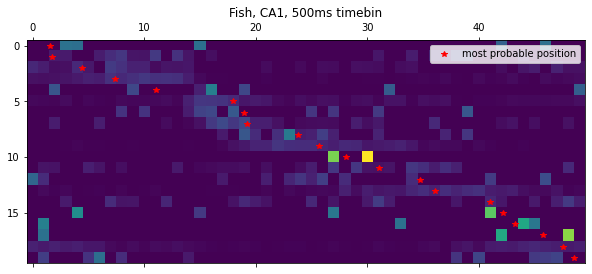

In [11]:
d=np.unique(Distance)
dif=d[1]-d[0]
plt.matshow(x1)
for i,pos in enumerate(pos_COM1[plst1]):
    line, = plt.plot(pos/dif,i,'r*')
line.set_label('most probable position')
plt.title('Fish, CA1, 500ms timebin')
plt.legend()

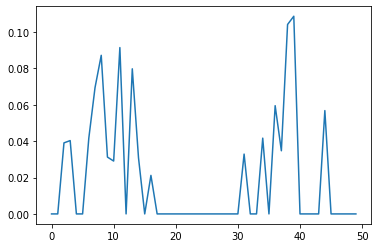

In [7]:
plt.figure()
plt.plot(x1[1,:])

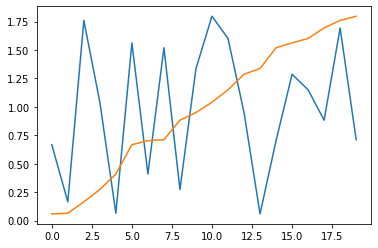

In [8]:
# check how position centers of mass are ordered
plt.plot(pos_COM1)
plt.plot(pos_COM1[plst1])

In [9]:
pos_COM1.shape

(20,)

In [15]:
%matplotlib inline

In [14]:
plt.matshow(-posterior_states1[:,plst1].T, cmap = 'gray')
plt.plot(Distance/Distance.max()*20, label='position')

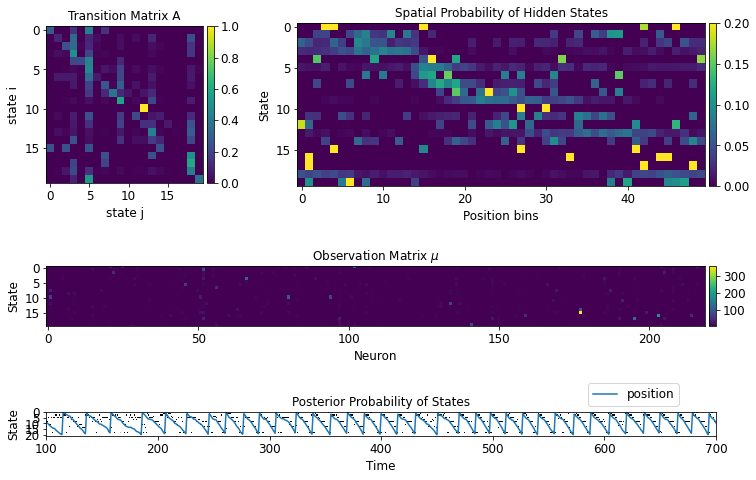

In [16]:
_, _, _, _, _, _ = CalHMM.show_all_plots(origin, Spike, Distance, lap_end, t_st=100, t_duration=600,vmax=.2)

### Time Shuffle

In [ ]:
ts_Spike = CalHMM.get_time_shuffle(Spike)
ts = hmmlearn.hmm.PoissonHMM(n_components=20) 
ts.fit(ts_Spike)

x2, plst2, occ2, posterior_states2, pos_COM2 = CalHMM.comp_poststates_pos(ts, Spike, Distance)
err_rate2, dev2, Decoded_position2 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states2, pos_COM2)

print(f'Error Rate: {err_rate2}')

In [ ]:
_, _, _, _, _, _ = CalHMM.show_all_plots(ts, Spike, Distance, lap_end, t_st=200, t_duration=300,vmax=.2)

## c. Save and Reolad

In [ ]:
save = False
if save==True:
    CalHMM.save_object(origin, f'{folder}/timebin_{timebin}_spk_origin.pkl')
    CalHMM.save_object(ts, f'{folder}/timebin_{timebin}_spk_ts.pkl')
    CalHMM.save_object(trsn, f'{folder}/timebin_{timebin}_spk_trsn.pkl')

In [ ]:
origin = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_origin.pkl')
ts = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_ts.pkl')
trsn = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_trsn.pkl')

## Check coactivation in states

In [19]:
origin.means_.shape, Spike.shape

((20, 219), (1821, 219))

In [ ]:
%matplotlib inline

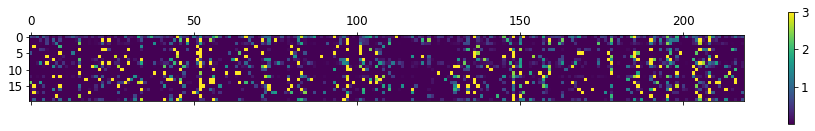

In [18]:
plt.matshow(origin.means_,vmax=3)
plt.colorbar()

## Method1. Select Involved Cells

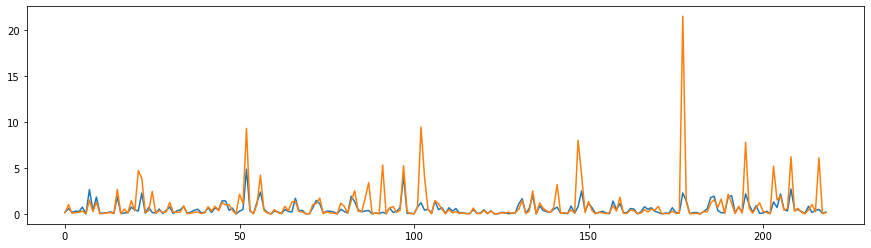

In [6]:
plt.figure(figsize=(15,4))
plt.plot(np.mean(Spike,axis=0))
plt.plot(np.mean(origin.means_,axis=0))

In [16]:
means_ = origin.means_.copy()
means_ = means_/means_.sum(axis=0) # Normalize across all states

(20, 219)


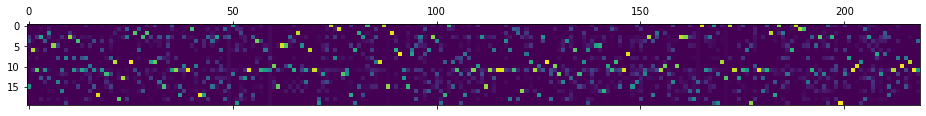

In [17]:
plt.matshow(means_)
print(means_.shape)

In [21]:
n=3 #plst1[8]
means=means_[n,:]
thr=means.mean()+3*means.std()
nn=np.where(means>thr)[0]
plt.plot(means)
plt.plot([0,origin.means_.shape[1]],[thr,thr])
plt.plot(nn, means[nn],'*')
plt.xlabel('#neuron')
plt.ylabel('value in mean matrix')
plt.title(f'{n}th state before sorting')
print(nn)

[ 10  28  99 152 160 161 194 197]


In [25]:
plt.figure(figsize=(15,4))
s=np.where(np.argmax(posterior_states1, axis = 1)==n)[0]

for j,i in enumerate(nn):
    t=Spike[:,i].copy()
    t=t/np.max(t)
    plt.plot(t+j, label=f'{i}')

plt.plot(s,np.zeros_like(s),'*')
plt.legend()

In [24]:
%matplotlib

Using matplotlib backend: GTK3Agg


In [ ]:
# for i,s in enumerate(Spike):
#     plt.plot(s+i*100)
# plt.show()

In [22]:
%matplotlib inline

In [ ]:
neuron=10

In [ ]:
# plt.figure()
# for i in range(10):
#     means=origin.means_[:,i]
#     thr=means.mean()+means.std()
#     nn=np.where(means>thr)[0]
#     plt.plot(means)
# #     plt.plot([0,origin.means_.shape[0]],[thr,thr])
# #     plt.plot([0,origin.means_.shape[0]],[means.mean(),means.mean()],label='mean')
# #     plt.plot([0,origin.means_.shape[0]],[means.std(),means.std()],label='std')
    
#     plt.plot(nn, means[nn],'*')
#     plt.xlabel('#state')
#     plt.ylabel('value in mean matrix')
# #     plt.title(f'{n}th state before sorting')
#     print(nn)

In [ ]:
origin.means_.shape

Text(0, 0.5, '# State')

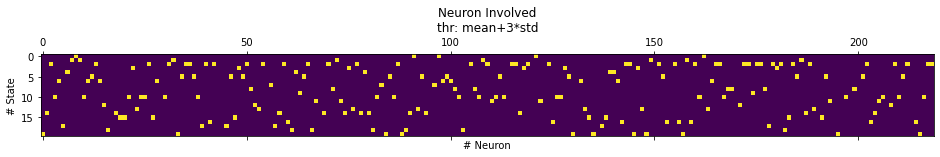

In [7]:
nn=[]
neuron_inv = np.zeros_like(origin.means_)
for i in range(origin.means_.shape[1]):
    means=origin.means_[:,i]
    thr=means.mean()+3*means.std()
    nn.append(np.where(means>thr)[0])
    neuron_inv[np.where(means>thr)[0],i]=1
    
plt.matshow(neuron_inv)
plt.title('Neuron Involved\nthr: mean+3*std')
plt.xlabel('# Neuron')
plt.ylabel('# State')

In [ ]:
state=plst1[8]
# plt.figure(figsize=(15,4))
# s=np.where(np.argmax(posterior_states1, axis = 1)==state)[0]

# for i,j in enumerate(np.where(neuron_inv[state,:])[0]):
#     t=Spike[:,j].copy()
#     t=t/origin.means_[state,j]
# #     t=t/np.max(t)
#     plt.plot(t+i, label=f'{j}')

# plt.plot(s,np.zeros_like(s),'*')
# plt.legend()

In [24]:
state=2
xx = Spike[np.concatenate((np.where(idx==state)[0],np.where(idx!=state)[0])),:].copy()
xx = xx[:,np.where(neuron_inv[state,:])[0]]
xx/=np.max(xx,axis=0)
# #     xx/=np.sum(xx,axis=1)[:,np.newaxis]
# # xx/=origin.means_[state,np.where(neuron_inv[state,:])[0]]
# plt.matshow(xx.T)
# plt.xlabel(f'timebin of state {state}')
# plt.ylabel('involved neurons')
# plt.plot([np.where(idx==state)[0].shape[0],np.where(idx==state)[0].shape[0]],[0,np.where(neuron_inv[state,:])[0].shape[0]-1],'r--')
# # plt.plot(s,np.zeros_like(s),'*')
# plt.show()
# print(np.where(neuron_inv[state,:])[0])

In [23]:
%matplotlib inline

## Method3. Wighted Sum of Neuron Emsemble activity

(20, 219)


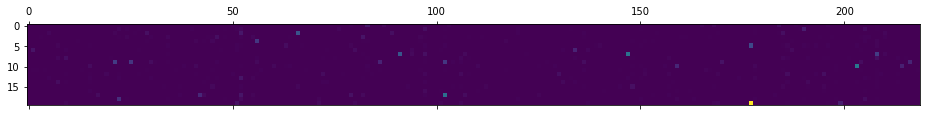

In [6]:
plt.matshow(origin.means_)
print(origin.means_.shape)

In [7]:
idx=np.argmax(posterior_states1, axis = 1)

In [26]:
state=0

In [27]:
Spike.shape

(1821, 219)

(101,)


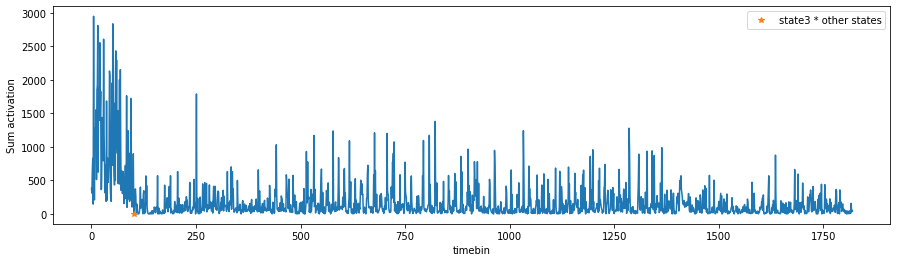

In [31]:
state+=1
xx = Spike[np.concatenate((np.where(idx==state)[0],np.where(idx!=state)[0])),:].copy()
print(np.where(idx==state)[0].shape)

plt.figure(figsize=(15,4))
xx=origin.means_[state,:]*xx
plt.plot(xx.sum(axis=1))
plt.plot(np.where(idx==state)[0].shape[0],0,'*',label=f'state{state} * other states')
plt.ylabel('Sum activation')
plt.xlabel('timebin')
plt.legend()

(45,)
(56,)
(9,)
(101,)
(42,)


<Figure size 1080x72 with 0 Axes>

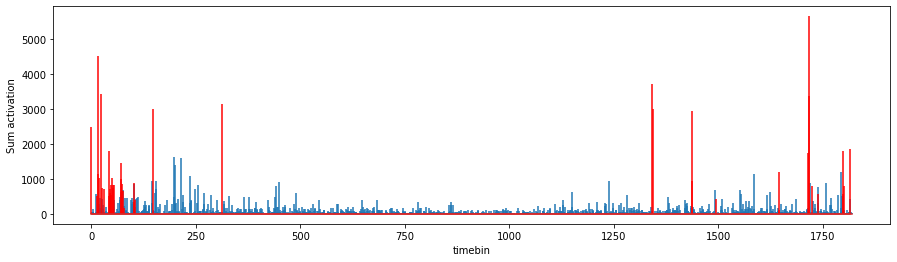

<Figure size 1080x72 with 0 Axes>

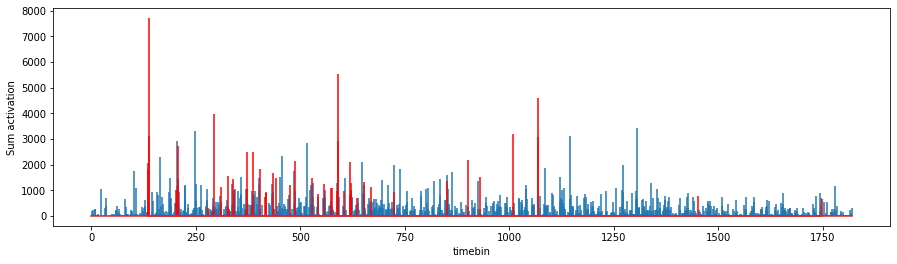

<Figure size 1080x72 with 0 Axes>

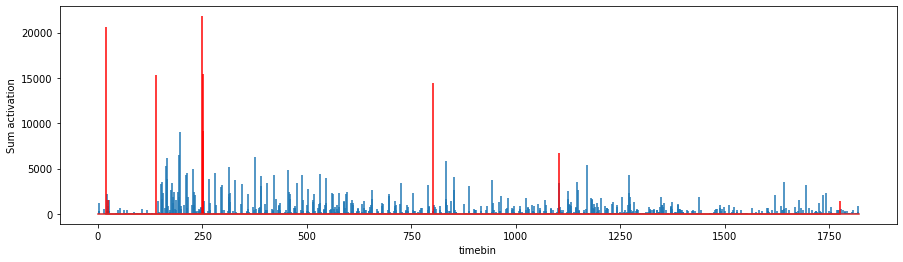

<Figure size 1080x72 with 0 Axes>

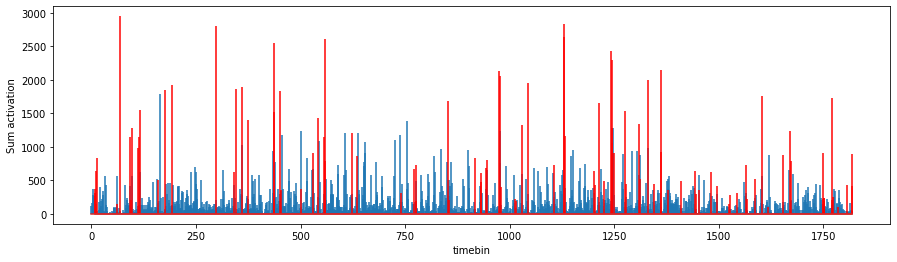

<Figure size 1080x72 with 0 Axes>

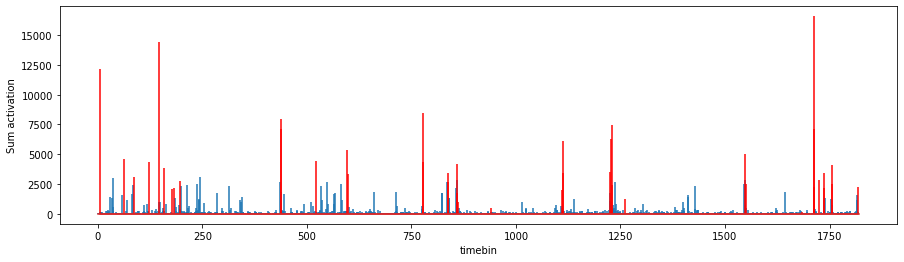

In [15]:
for state in range(5):
    plt.figure(figsize=(15,1))
    xx = Spike[np.concatenate((np.where(idx==state)[0],np.where(idx!=state)[0])),:].copy()
    print(np.where(idx==state)[0].shape)

    plt.figure(figsize=(15,4))
    xx=origin.means_[state,:]*Spike
    plt.stem(np.where(idx!=state)[0],xx[np.where(idx!=state)[0],:].sum(axis=1),label=f'At State {state}', markerfmt=" ")
    plt.stem(np.where(idx==state)[0],xx[np.where(idx==state)[0],:].sum(axis=1),'r',label=f'At State {state}', markerfmt=" ")

    plt.ylabel('Sum activation')
    plt.xlabel('timebin')

In [ ]:
cat

In [29]:
%matplotlib inline

In [ ]:
plt.figure()
plt.plot(xx[1440,:]/np.max(xx[1440,:]))
plt.plot(origin.means_[4,:]/np.max(origin.means_[4,:]))
plt.show()
plt.plot((origin.means_[4,:]*xx)[1440,:])
plt.show()
plt.plot(origin.means_[4,:]*xx[1440,:])
# xx[0,:].shape,origin.means_[4,:].shape

In [22]:
np.where((origin.means_[4,:]*xx[1440,:])!=0)

(array([  3,  67,  84, 107, 157, 200, 205, 208, 209]),)

In [23]:
xx[1440,205],origin.means_[4,205],origin.means_[4,205]*xx[1440,205],(origin.means_[4,:]*xx[1440,:])[205]

(24.999999999999996, 2.7239245803932497, 68.09811450983123, 68.09811450983123)

In [ ]:
np.arange(5),np.arange(7,12)

In [ ]:
test=np.zeros_like(xx)
for i in range(1821):
    test[i,:]=xx[i,:]*origin.means_[state,:]

In [ ]:
xx = xx
xx/=np.max(xx,axis=0)
plt.figure(figsize=(15,4))
plt.plot(xx.sum(axis=1))
plt.plot(np.where(idx==state)[0].shape[0],0,'*',label=f'state{state} * other states')
plt.ylabel('Sum activation')
plt.xlabel('timebin')
plt.legend()